# Infinite Potential Well

Not complete yet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from ipywidgets import interactive
from scipy.integrate import simps
import ipywidgets as widgets
%matplotlib inline

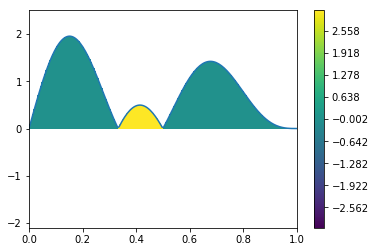

In [30]:
def eigwav_1D(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

def eigeng_1D(n,L,hbar = 1,m0 = 1):
    return (n*hbar)**2/2.0/m0*(np.pi/L)**2

def TDeigwav_1D(n,L,x,t,hbar = 1):
    E = eigeng_1D(n,L)
    return eigwav_1D(n,L,x)*np.exp(-1j*E*t/hbar)

def norm_1D(psi,x):
    return simps(psi*np.conjugate(psi),x)

def superposition_1D(n,L,x,t):
    psi = np.zeros(len(x))
    for m in n:
        psi = psi + TDeigwav_1D(m,L,x,t)
    norm = norm_1D(psi,x)
    return psi/np.sqrt(norm)
        

    
def f(t):
    
#     plt.figure(2)
    ax = plt.gca()
    ax.cla()
    
    L = 1
    x = np.linspace(0,L,200)
    n  = np.array([1,3,4])
    
    psi = superposition_1D(n,L,x,t)
    psi_mag = abs(psi)
    
    phase_angle = np.angle(psi)

    points = np.array([x, psi_mag]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:], points[:]], axis=1)
    segments[:,1,1] = 0
    lc = LineCollection(segments, cmap=plt.get_cmap('viridis'), # viridis,plasma
                        norm=plt.Normalize(-np.pi, np.pi))
    lc.set_array((phase_angle))
    lc.set_linewidth(2)


    plt.gca().add_collection(lc)

    plt.plot(x,psi_mag)
    plt.xlim([0,L])
    plt.ylim(-2.1,2.5)
    plt.colorbar(CS3)
    plt.show()
    

Z = [[0,0],[0,0]]
levels = np.arange(-np.pi-0.01,np.pi+0.01,0.01)
CS3 = plt.contourf(Z, levels, cmap=plt.get_cmap('viridis'));
plt.clf()  
interactive_plot = interactive(f, t=widgets.FloatSlider(min=0, max=0.3, step=0.005)) 
output = interactive_plot.children[-1]
# output.layout.height = '100px'
interactive_plot